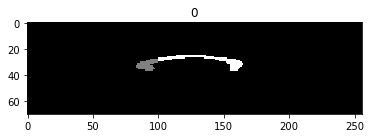

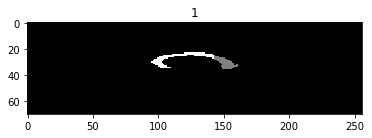

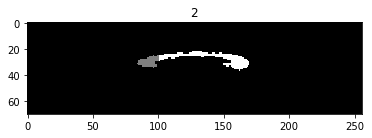

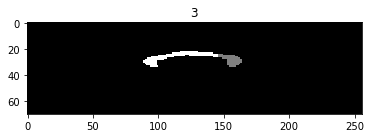

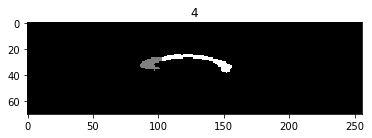

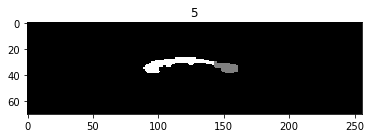

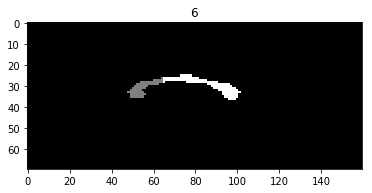

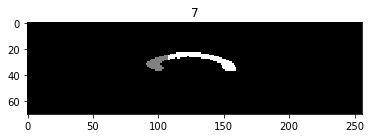

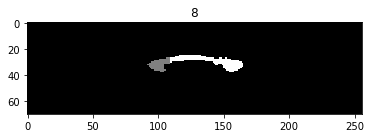

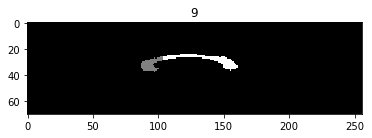

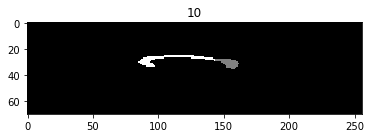

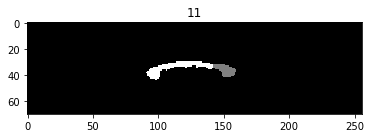

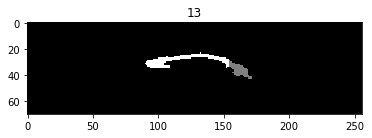

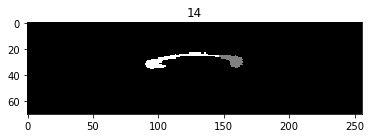

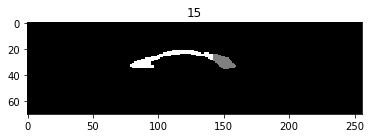

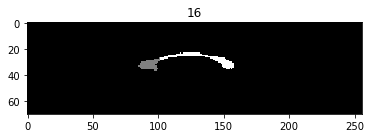

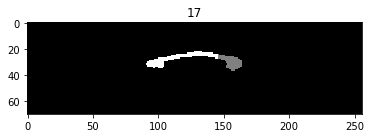

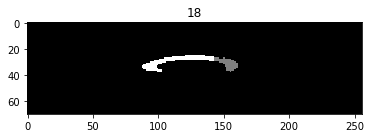

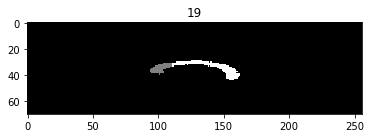

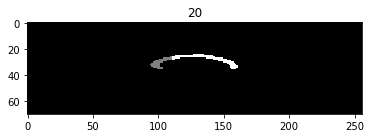

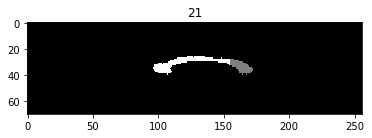

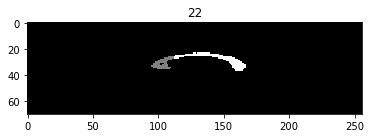

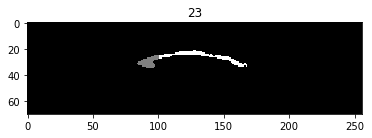

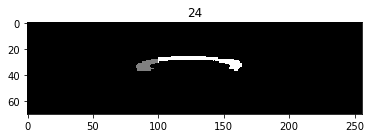

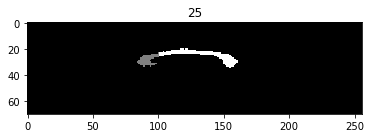

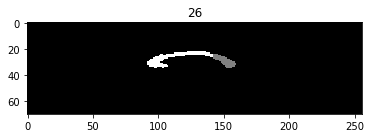

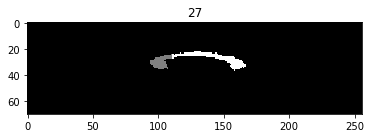

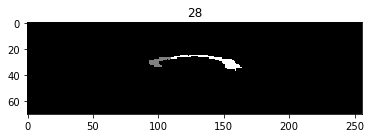

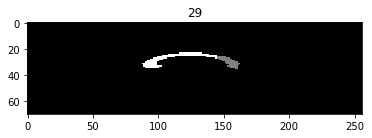

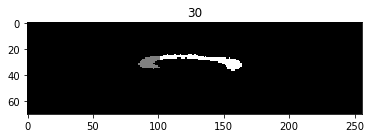

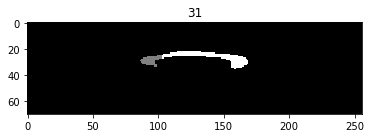

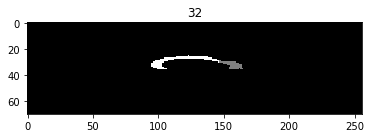

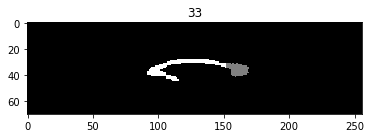

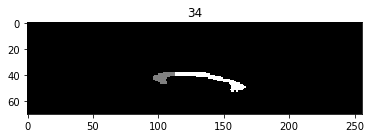

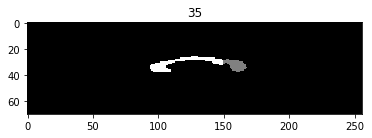

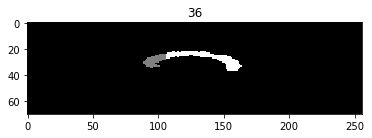

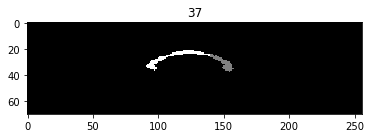

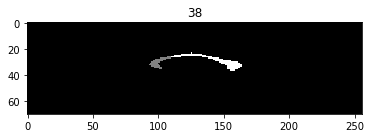

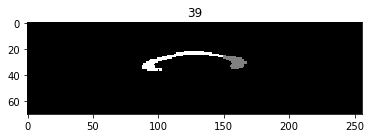

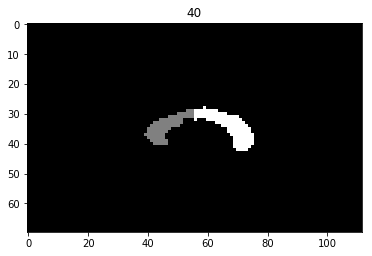

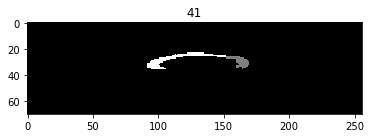

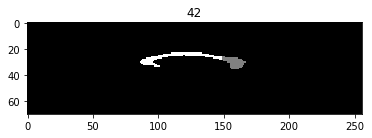

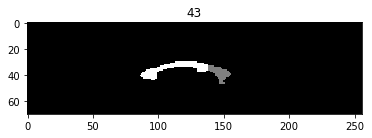

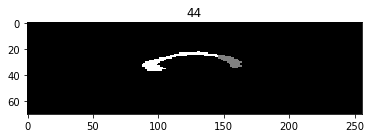

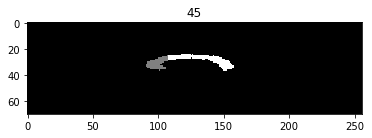

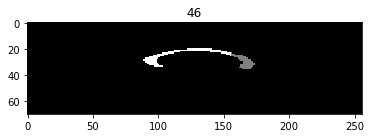

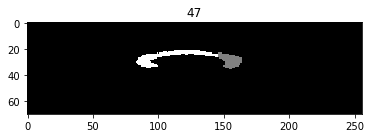

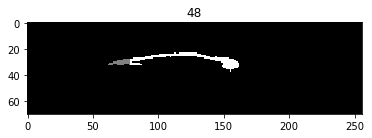

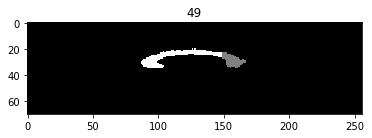

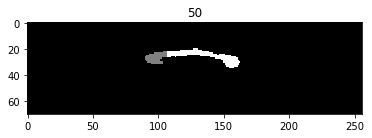

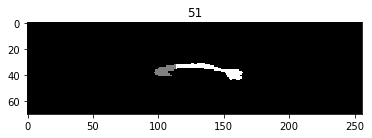

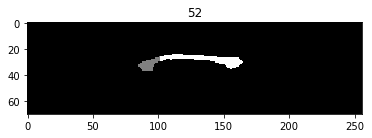

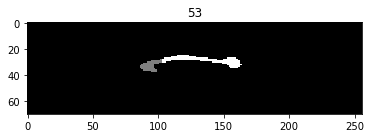

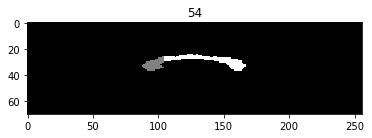

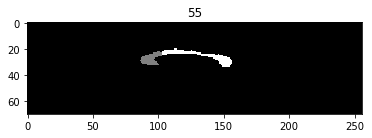

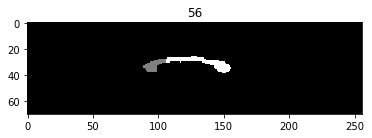

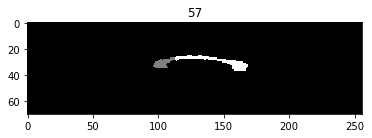

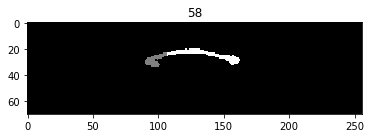

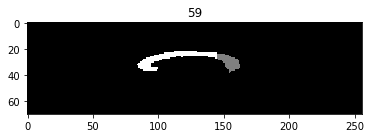

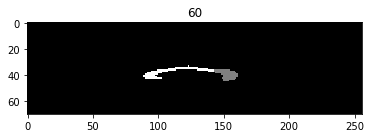

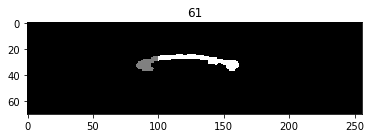

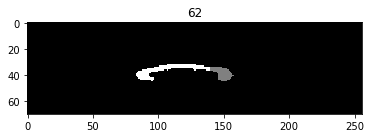

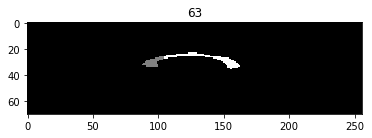

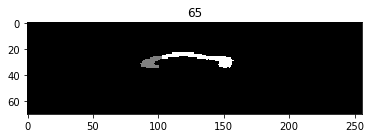

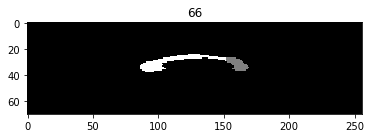

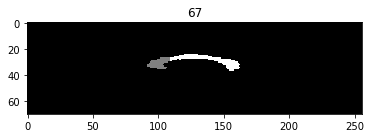

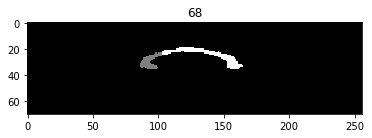

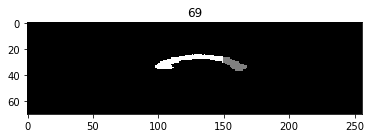

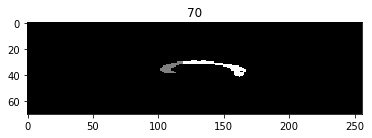

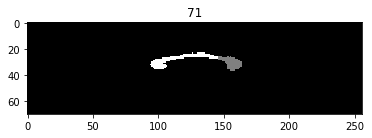

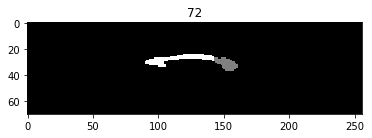

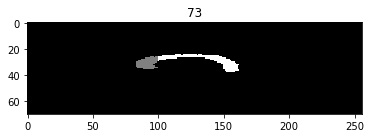

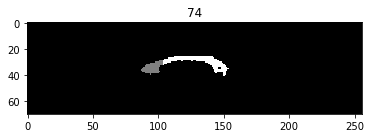

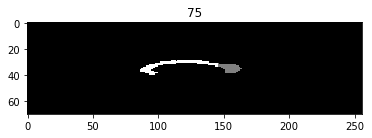

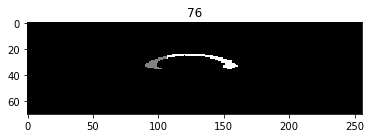

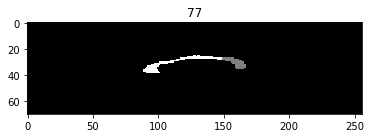

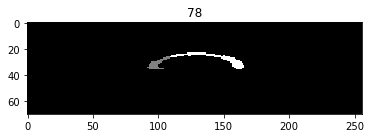

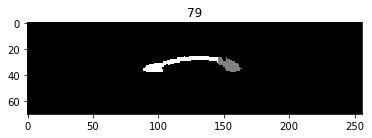

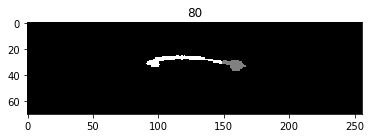

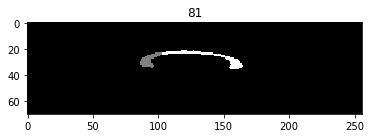

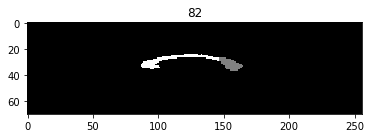

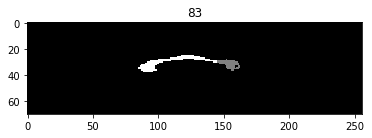

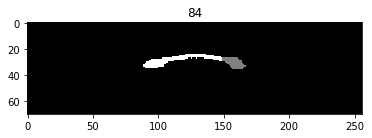

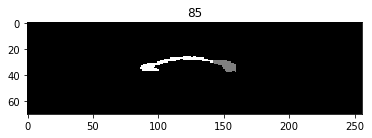

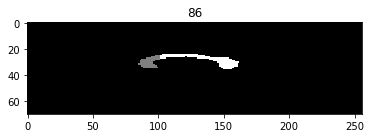

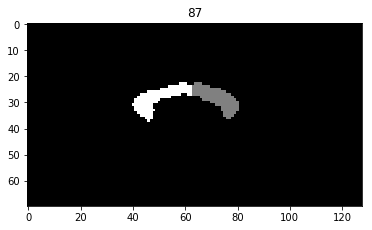

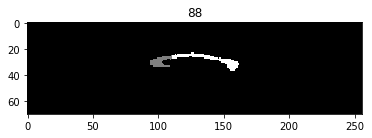

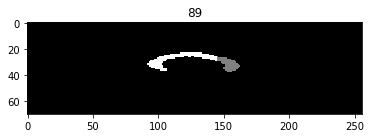

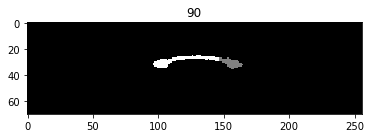

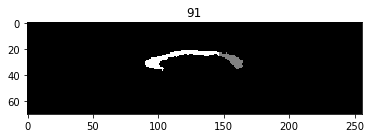

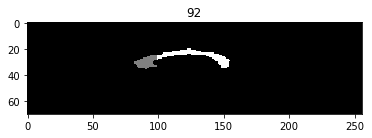

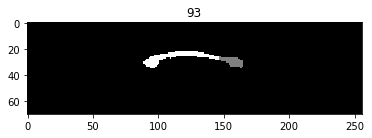

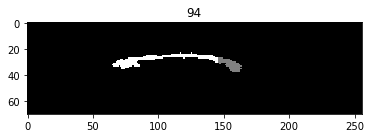

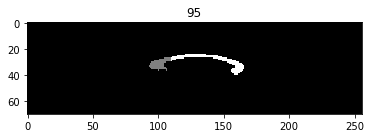

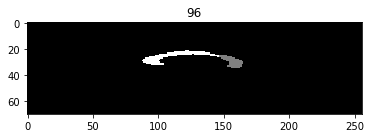

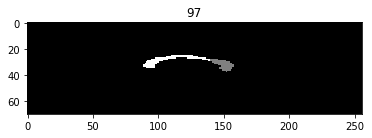

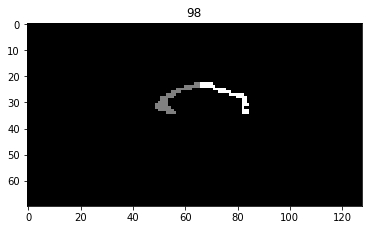

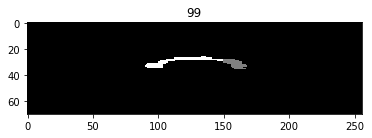

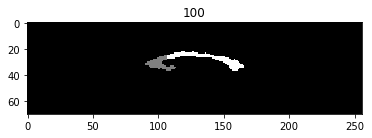

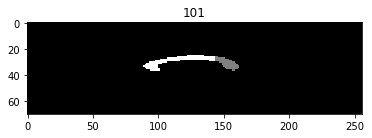

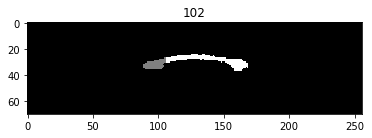

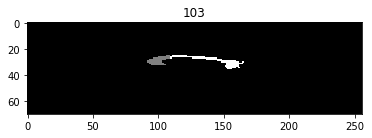

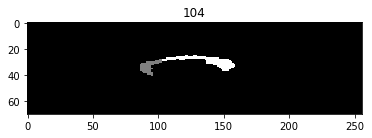

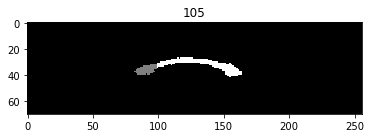

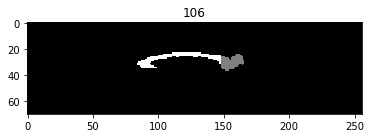

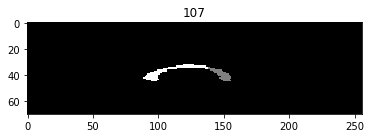

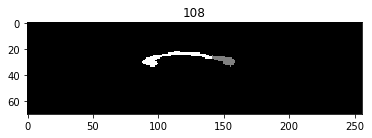

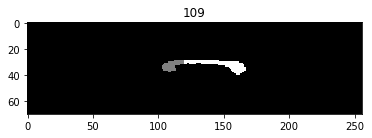

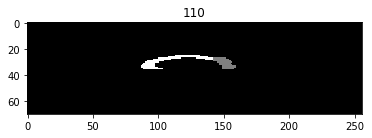

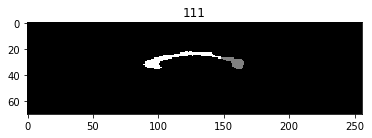

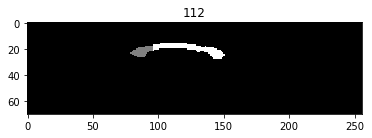

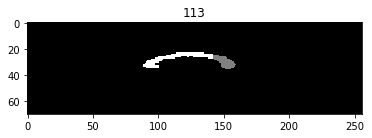

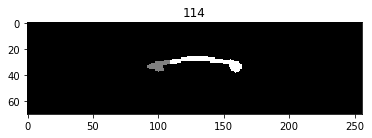

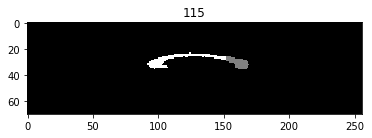

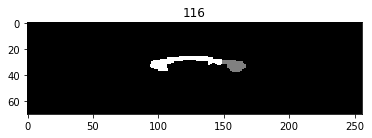

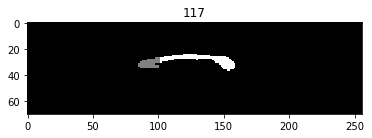

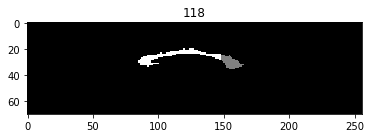

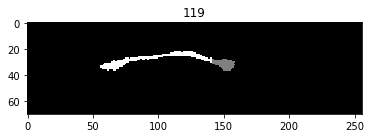

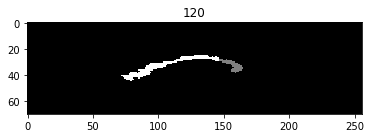

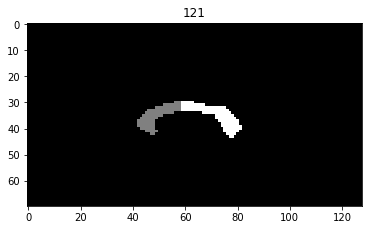

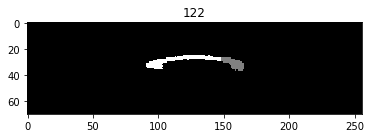

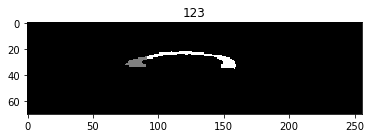

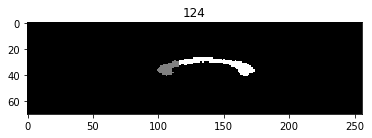

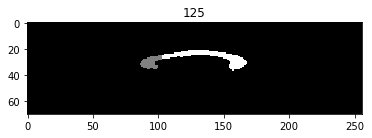

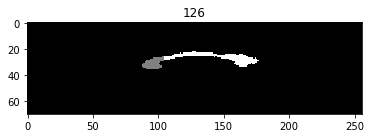

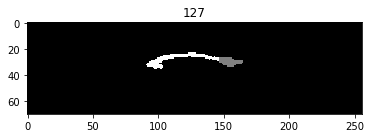

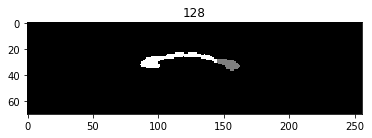

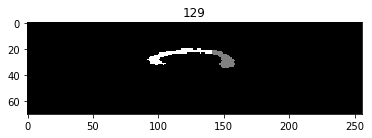

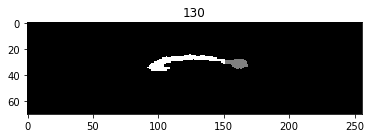

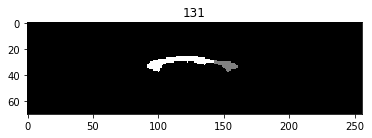

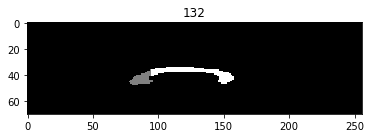

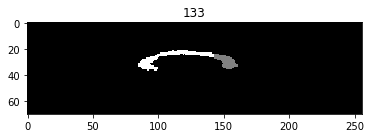

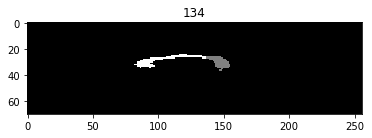

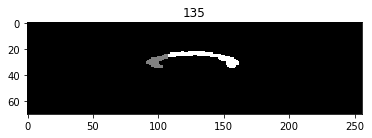

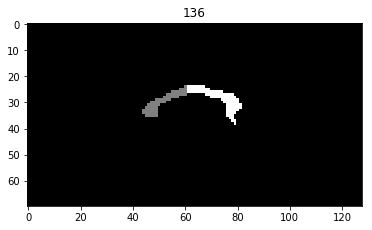

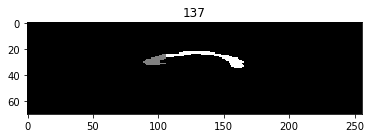

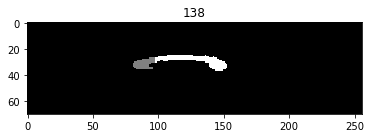

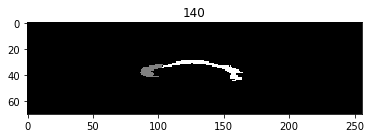

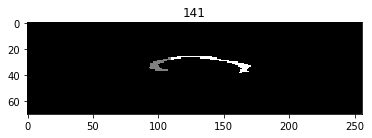

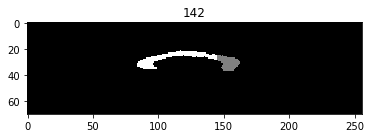

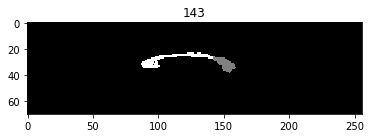

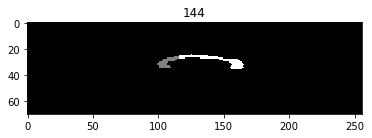

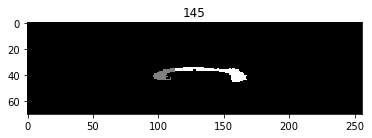

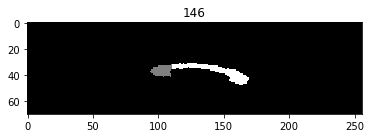

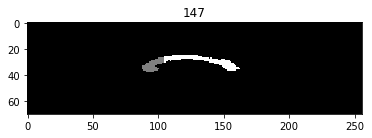

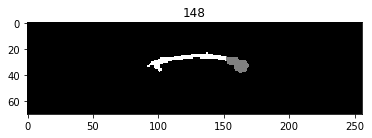

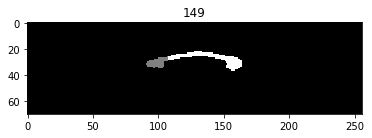

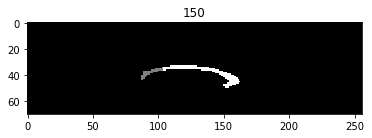

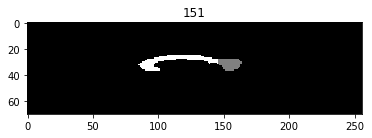

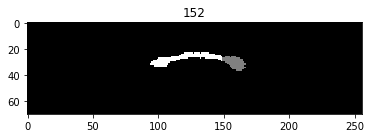

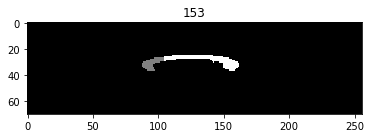

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import genfromtxt
import scipy.ndimage
import sys
%matplotlib inline

#Loading labeled segmentations
seg_label = genfromtxt('../../dataset/Seg_Watershed/watershed_label.csv', delimiter=',').astype('uint8')
list_masks_wt = seg_label[seg_label[:,1] == 0, 0] #Extracting segmentations
#Loading labeled segmentations
seg_label = genfromtxt('../../dataset/Seg_ROQS/roqs_label.csv', delimiter=',').astype('uint8')
list_masks_rq = seg_label[seg_label[:,1] == 0, 0] #Extracting segmentations
#Loading labeled segmentations
seg_label = genfromtxt('../../dataset/Seg_pixel/pixel_label.csv', delimiter=',').astype('uint8')
list_masks_px = seg_label[seg_label[:,1] == 0, 0] #Extracting segmentations

array_methods = np.zeros((154,3))
array_methods[list_masks_wt,0] = True
array_methods[list_masks_rq,1] = True
array_methods[list_masks_px,2] = True
path_save = '../../dataset/Seg_DataAug/'
for ind in range(154):
    try:
        opt_method = random.choice(np.where(array_methods[ind])[0])
        if opt_method == 0:
            mask_pn = np.load('../../dataset/Seg_Watershed/mask_wate_{}.npy'.format(ind))
        elif opt_method == 1:
            mask_pn = np.load('../../dataset/Seg_ROQS/mask_roqs_{}.npy'.format(ind))
        else:
            mask_pn = np.load('../../dataset/Seg_pixel/mask_pixe_{}.npy'.format(ind))
        
        val_mod = np.where(np.sum(mask_pn,axis=0))[0]
        coord_end, coord_start = val_mod[-1], val_mod[0]
        opt_mod = random.choice((0,1))
        mask_pn_mod = mask_pn.copy()
        if opt_mod == 0:
            mask_pn_mod[:,:coord_start+17] = False
        else:
            mask_pn_mod[:,coord_end-17:] = False
        lab_mask, num_labels = scipy.ndimage.measurements.label(mask_pn_mod)
        lab_mask[lab_mask!=1] = 0
            
        plt.figure()
        plt.imshow(lab_mask*128+mask_pn*128, cmap='gray')
        plt.title("{}".format(ind))
        np.save(path_save+"mask_data_{}.npy".format(ind),lab_mask)
        mystdout=open(str(path_save)+'dataaug_label.csv','a')
        sys.stdout=mystdout
        print ind,",1"
        mystdout.close()
        sys.stdout=sys.__stdout__
    except:
        pass

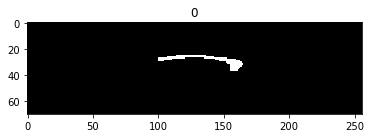

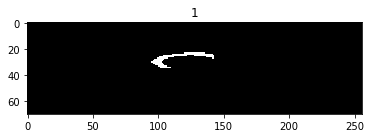

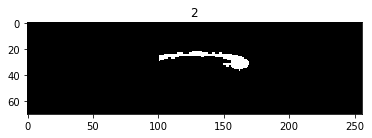

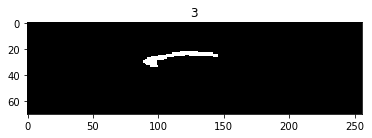

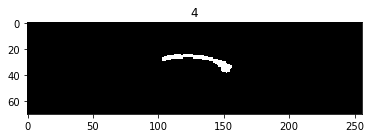

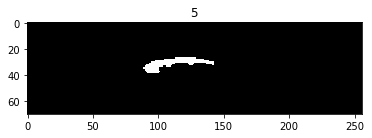

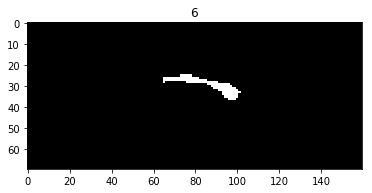

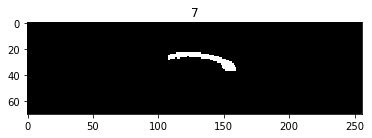

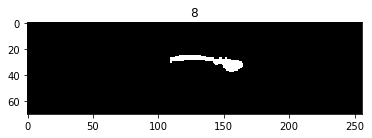

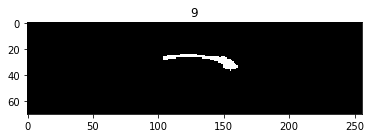

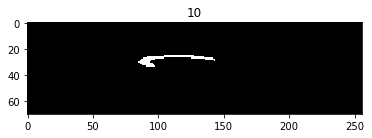

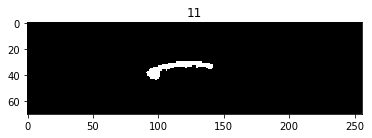

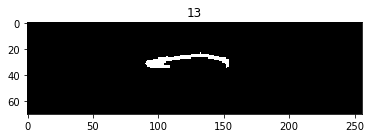

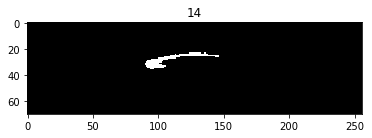

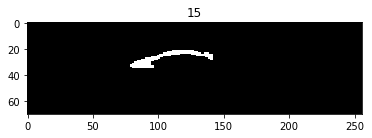

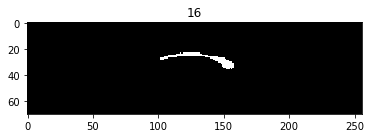

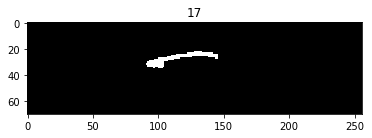

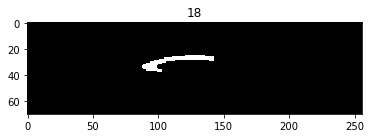

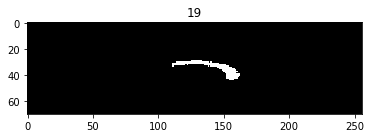

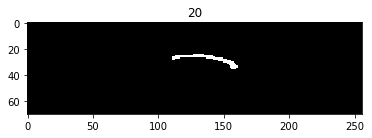

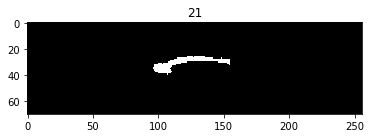

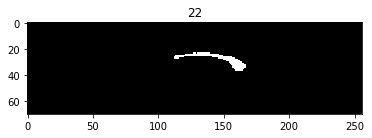

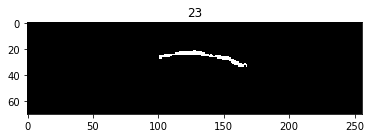

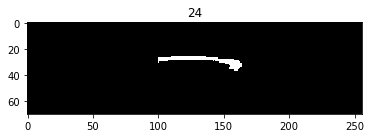

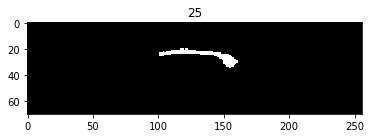

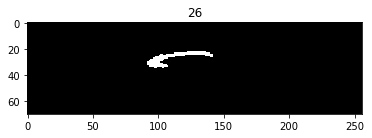

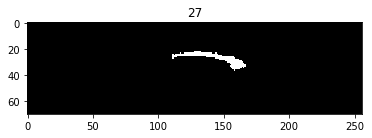

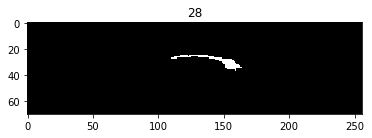

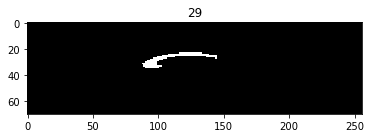

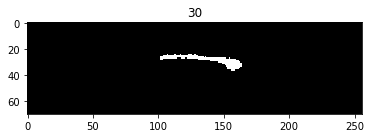

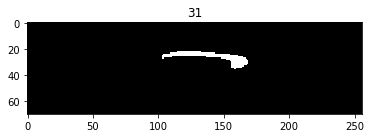

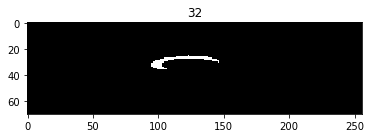

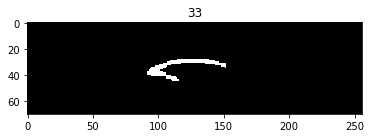

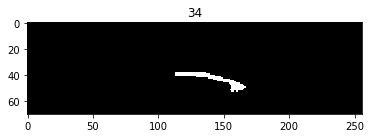

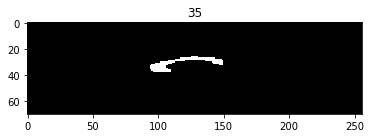

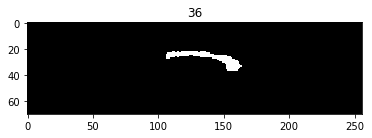

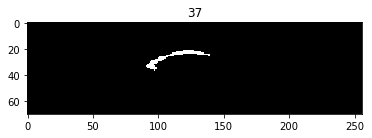

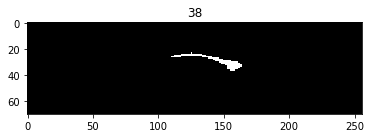

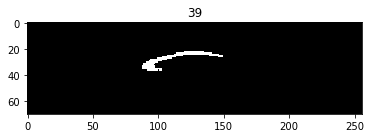

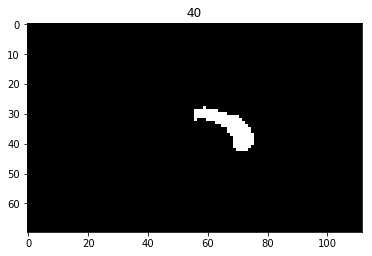

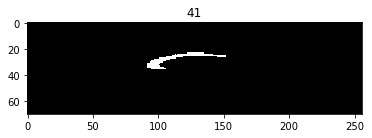

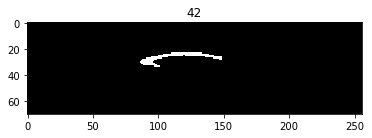

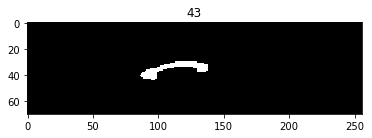

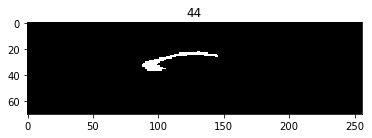

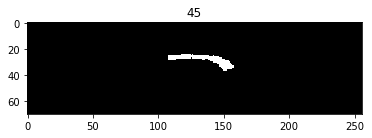

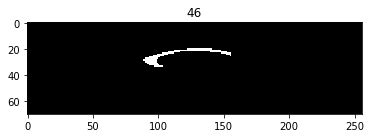

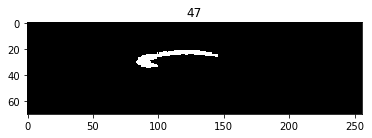

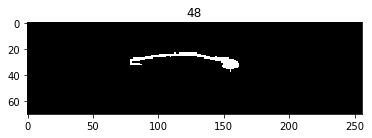

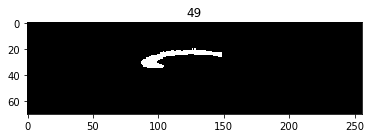

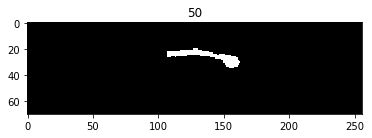

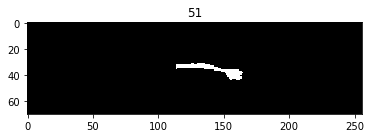

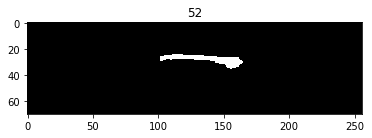

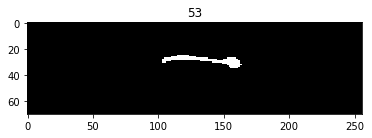

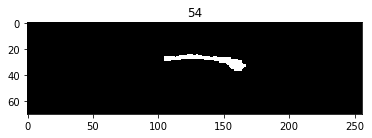

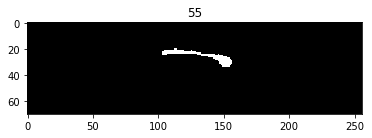

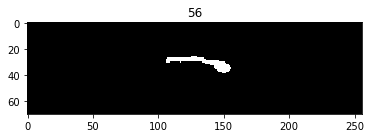

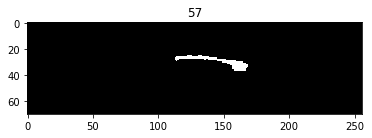

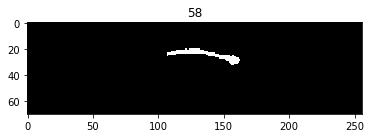

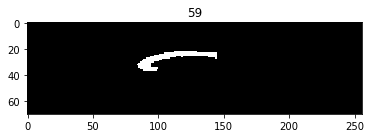

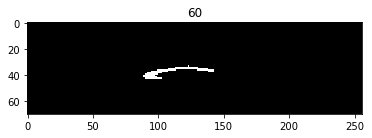

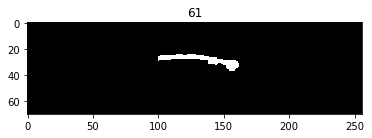

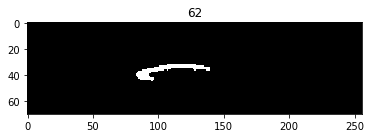

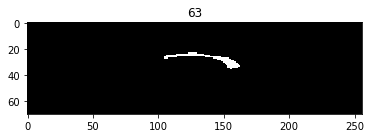

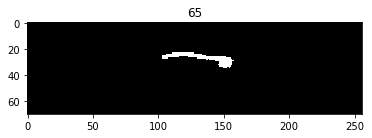

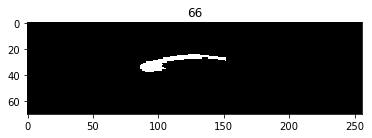

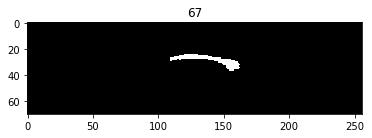

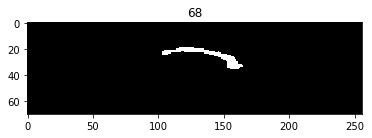

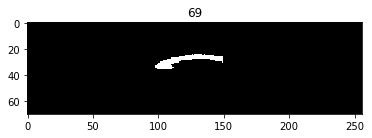

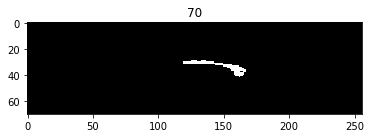

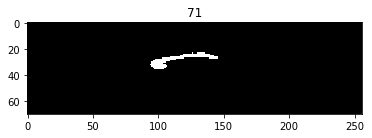

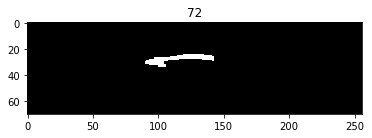

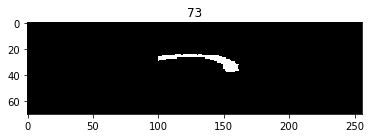

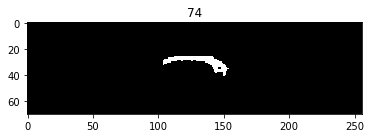

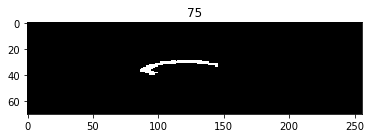

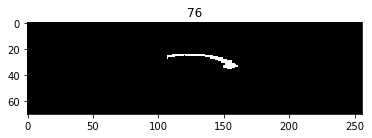

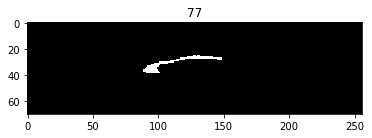

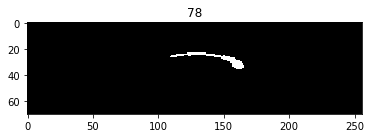

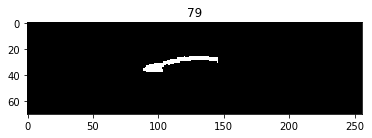

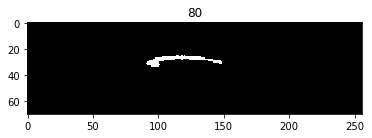

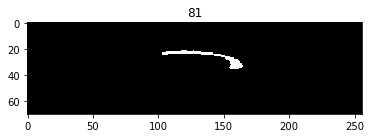

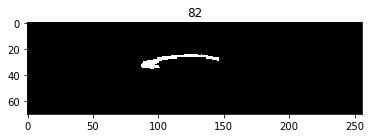

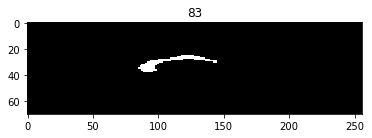

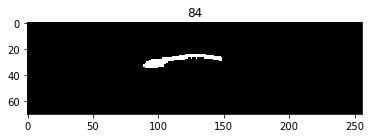

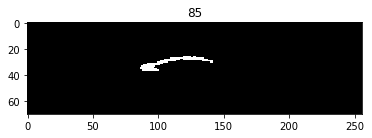

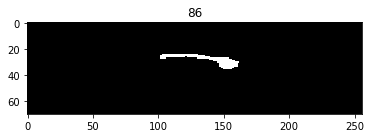

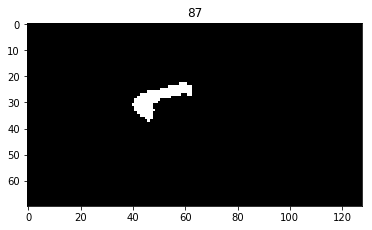

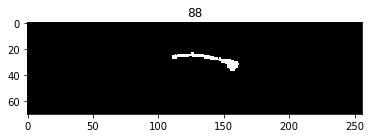

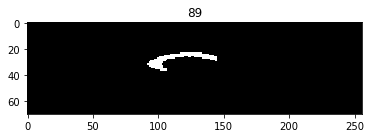

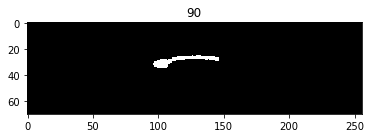

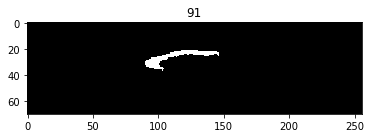

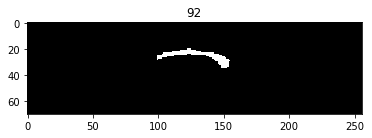

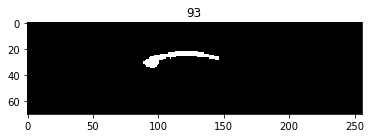

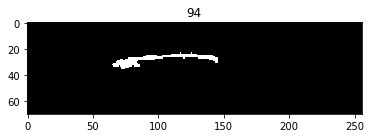

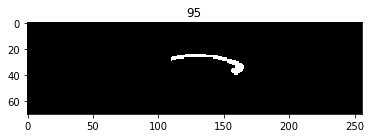

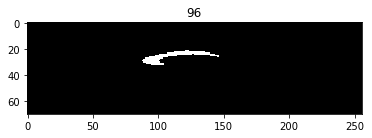

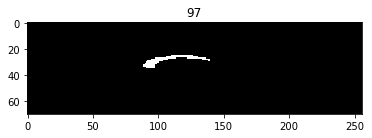

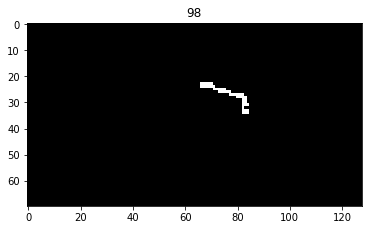

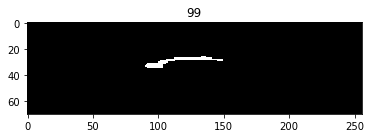

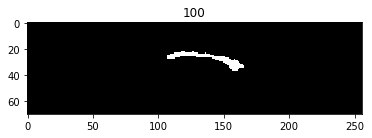

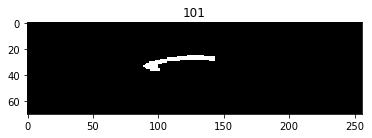

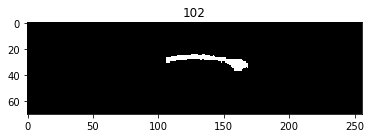

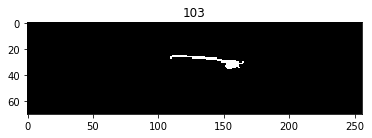

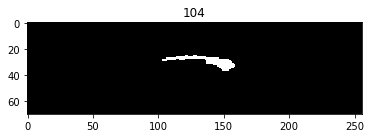

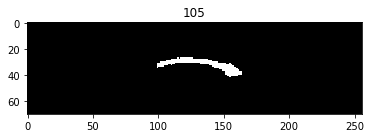

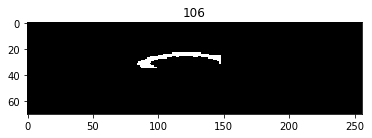

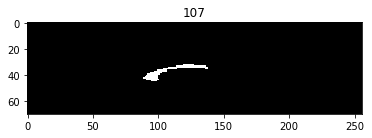

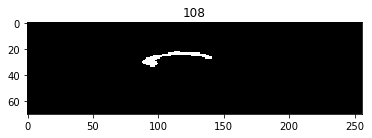

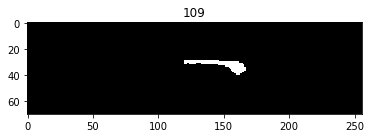

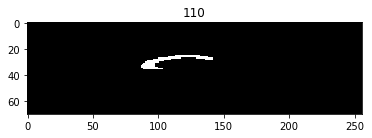

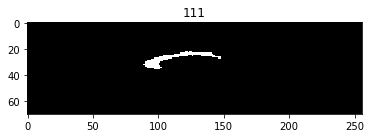

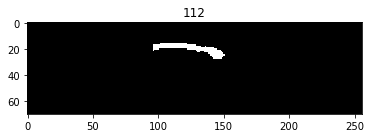

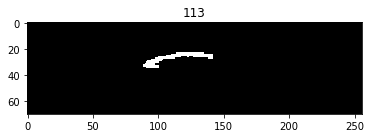

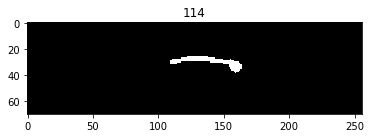

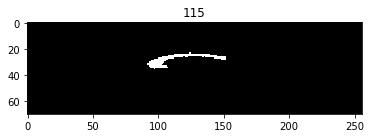

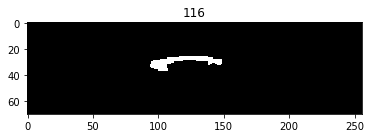

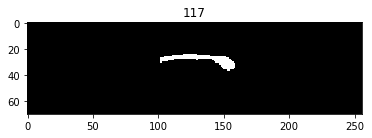

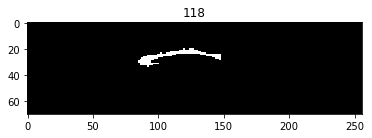

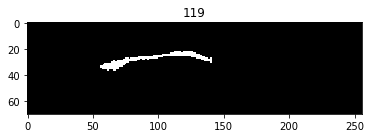

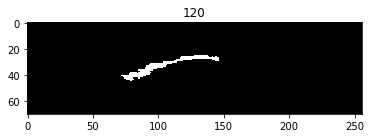

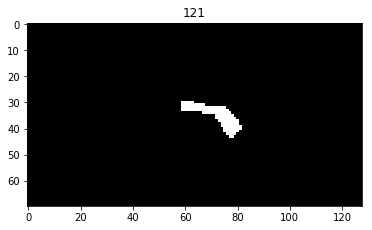

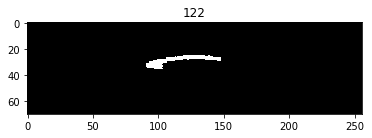

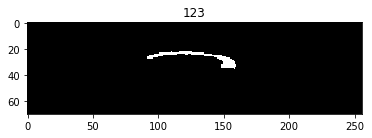

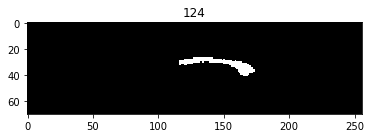

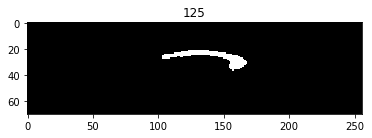

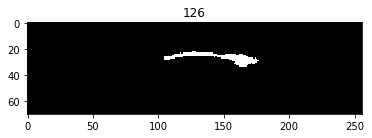

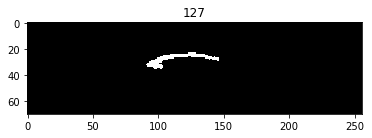

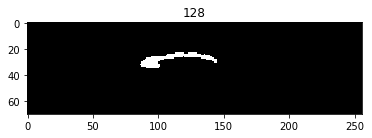

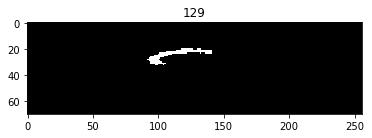

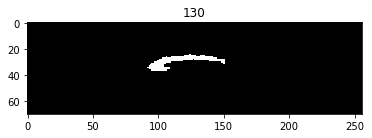

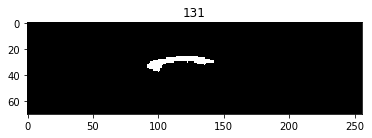

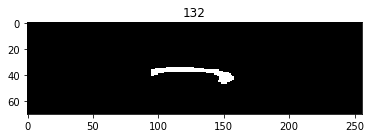

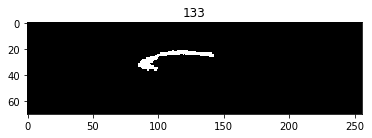

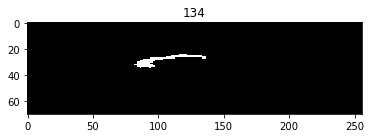

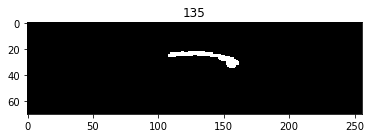

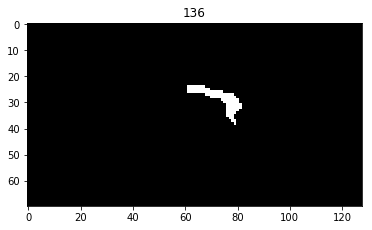

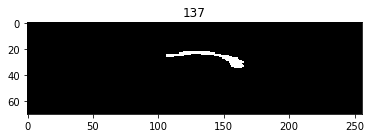

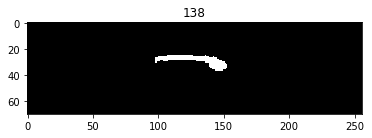

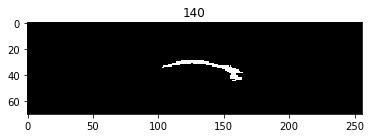

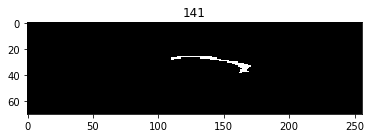

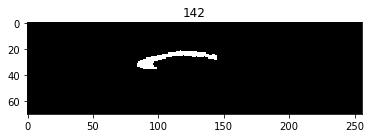

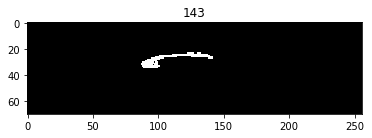

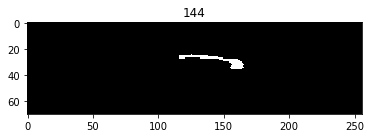

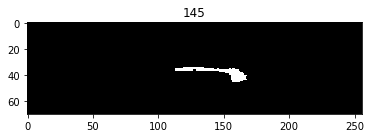

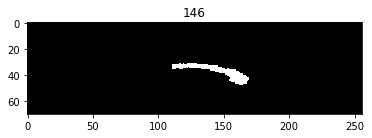

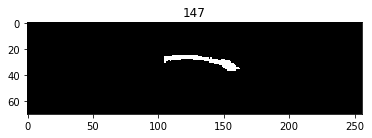

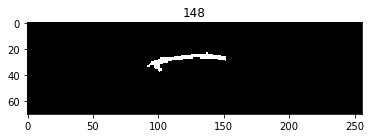

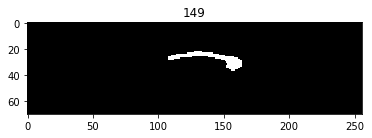

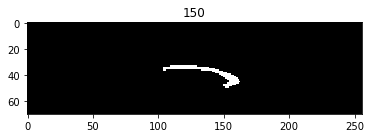

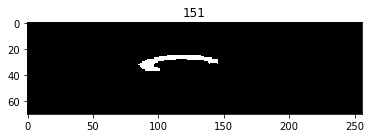

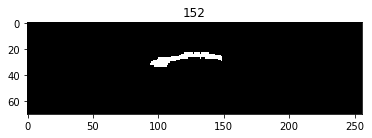

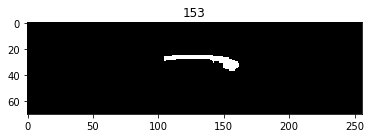

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import genfromtxt
import scipy.ndimage
import sys
%matplotlib inline

#Loading labeled segmentations
seg_label = genfromtxt('../../dataset/Seg_DataAug/dataaug_label.csv', delimiter=',').astype('uint8')
list_masks = seg_label[seg_label[:,1] == 1, 0] #Extracting segmentations

for ind in list_masks:
    mask_pn = np.load('../../dataset/Seg_DataAug/mask_data_{}.npy'.format(ind))
    plt.figure()
    plt.imshow(mask_pn, cmap='gray')
    plt.title("{}".format(ind))